<a href="https://colab.research.google.com/github/pony-yyy/GroupWork/blob/main/Restaurant_in_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [31]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [32]:
# Query all data from the table
query = f"""
  SELECT
  b.business_id,
  t.text AS review
FROM
  `{project_id}.{dataset_name}.All_data_cleaned` b
INNER JOIN
  `{project_id}.{dataset_name}.restaurant_tips` t
ON
  b.business_id = t.business_id
WHERE
  b.state = 'FL';

"""

query_job = bigquery_client.query(query)
results = query_job.result()

reviewInPa_df = query_job.to_dataframe()
reviewInPa_df

,business_id,review
0,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...
1,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef
2,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread
3,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...
4,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban
...,...,...
111104,J8sruBXIMooknVlToC2CEQ,So sad. Hattie's has closed:(. Best wishes to ...
111105,kaQ-ReAmU-xO2XnQsMFwRg,Tuesday night is half off wine bottles. Thursd...
111106,2VuOLrhe2Iu_FRz1gEIqQA,They are closed at 530 when the sign says 6:00.
111107,dsfRniRgfbDjC8os848B6A,Experience Bern's by sitting at the bar too . ...


In [33]:
import pandas as pd
from textblob import TextBlob
import numpy as np

target_column = 'review'

reviewInPa_df['Polarity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
reviewInPa_df['Subjectivity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)

reviewInPa_df['Sentiment'] = np.where(reviewInPa_df['Polarity'] > 0, 'Positive', np.where(reviewInPa_df['Polarity'] < 0, 'Negative', 'Neutral'))

reviewInPa_df

,business_id,review,Polarity,Subjectivity,Sentiment
0,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,0.700000,0.600000,Positive
1,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,0.000000,0.000000,Neutral
2,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,0.000000,0.000000,Neutral
3,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,0.337500,0.645833,Positive
4,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,0.000000,0.066667,Neutral
...,...,...,...,...,...
111104,J8sruBXIMooknVlToC2CEQ,So sad. Hattie's has closed:(. Best wishes to ...,-0.087500,0.600000,Negative
111105,kaQ-ReAmU-xO2XnQsMFwRg,Tuesday night is half off wine bottles. Thursd...,-0.166667,0.166667,Negative
111106,2VuOLrhe2Iu_FRz1gEIqQA,They are closed at 530 when the sign says 6:00.,-0.100000,0.100000,Negative
111107,dsfRniRgfbDjC8os848B6A,Experience Bern's by sitting at the bar too . ...,0.783333,0.850000,Positive


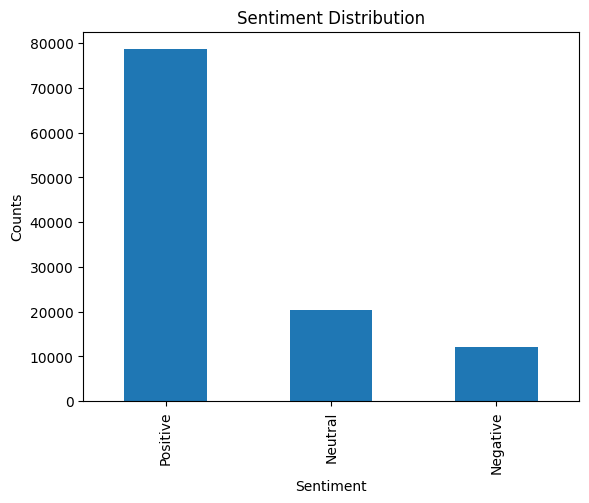

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = reviewInPa_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [35]:
positive_reviews = reviewInPa_df[reviewInPa_df['Sentiment'] == 'Positive']

positive_review_counts = positive_reviews.groupby('business_id').size()

top_10_positive_businesses = positive_review_counts.sort_values(ascending=False).head(10)

print(top_10_positive_businesses)

business_id
QHWYlmVbLC3K6eglWoHVvA    376
RqW9S4WG9UYZHKhHRHXJZg    307
fCDMLD21ypv1XZ_EyafCkQ    306
DXDoh8MNrqjtXsZnkuk4hA    266
2KIDQyTh-HzLxOUEDqtDBg    214
L5LLN0RafiV1Z9cddzvuCw    201
dsfRniRgfbDjC8os848B6A    190
3YqUe2FTCQr0pPVK8oCv6Q    189
Ps7Q7BOKzJO4nDTUhbk43Q    184
Bxmhm659VqrQYHc0hiku5w    182
dtype: int64


In [36]:
top_10_positive_businesses_df = top_10_positive_businesses.reset_index()
top_10_positive_businesses_df.columns = ['business_id', 'positive_review_count']

print(top_10_positive_businesses_df)

              business_id  positive_review_count
0  QHWYlmVbLC3K6eglWoHVvA                    376
1  RqW9S4WG9UYZHKhHRHXJZg                    307
2  fCDMLD21ypv1XZ_EyafCkQ                    306
3  DXDoh8MNrqjtXsZnkuk4hA                    266
4  2KIDQyTh-HzLxOUEDqtDBg                    214
5  L5LLN0RafiV1Z9cddzvuCw                    201
6  dsfRniRgfbDjC8os848B6A                    190
7  3YqUe2FTCQr0pPVK8oCv6Q                    189
8  Ps7Q7BOKzJO4nDTUhbk43Q                    184
9  Bxmhm659VqrQYHc0hiku5w                    182


In [37]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

# Query all data from the table
query = f"""
   SELECT business_id,categories
   FROM `{project_id}.{dataset_name}.{table_name}`;

"""

query_job = bigquery_client.query(query)
results = query_job.result()

categories_df = query_job.to_dataframe()
categories_df

,business_id,categories
0,kfNv-JZpuN6TVNSO6hHdkw,"Steakhouses, Asian Fusion, Restaurants"
1,sqSqqLy0sN8n2IZrAbzidQ,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,RK6-cJ9hj53RzOlCBmpT-g,"Restaurants, Italian, Food Trucks, Food"
3,EuRGgOwJ0g1vTj2R04j37Q,"Seafood, Restaurants"
4,pmuuoDqNZp7518AUd-YmPA,"Restaurants, Bakeries, Caterers, Bagels, Food,..."
...,...,...
52281,xThXwInJdMTI2yhgY3Uwyw,"Restaurants, Mexican"
52282,QKB21Alitgj-m6oEoFZFBw,"Restaurants, Mexican"
52283,4D19uG4enigRAsvTVmn61g,"Restaurants, Mexican"
52284,HUJLxKMVmUvreA-07qUitg,"Restaurants, Mexican"


In [38]:
categories_in_top_10_businesses = pd.merge(top_10_positive_businesses_df, categories_df, on='business_id', how='inner')
categories_in_top_10_businesses

,business_id,positive_review_count,categories
0,QHWYlmVbLC3K6eglWoHVvA,376,"Burgers, Bars, Restaurants, American (Traditio..."
1,RqW9S4WG9UYZHKhHRHXJZg,307,"Ethnic Food, Restaurants, Specialty Food, Mexi..."
2,fCDMLD21ypv1XZ_EyafCkQ,306,"Spanish, Cafes, Cuban, Latin American, Juice B..."
3,DXDoh8MNrqjtXsZnkuk4hA,266,"Sandwiches, American (Traditional), Restaurant..."
4,2KIDQyTh-HzLxOUEDqtDBg,214,"Specialty Food, Delis, Coffee Roasteries, Butc..."
5,L5LLN0RafiV1Z9cddzvuCw,201,"Breweries, Food, American (New), Beer, Wine & ..."
6,dsfRniRgfbDjC8os848B6A,190,"Arts & Entertainment, Steakhouses, Restaurants"
7,3YqUe2FTCQr0pPVK8oCv6Q,189,"Latin American, Restaurants, Spanish, American..."
8,Ps7Q7BOKzJO4nDTUhbk43Q,184,"Restaurants, American (Traditional), Tapas/Sma..."
9,Bxmhm659VqrQYHc0hiku5w,182,"Salad, Food, Pizza, Restaurants, Desserts, Ice..."


In [39]:
pip install wordcloud

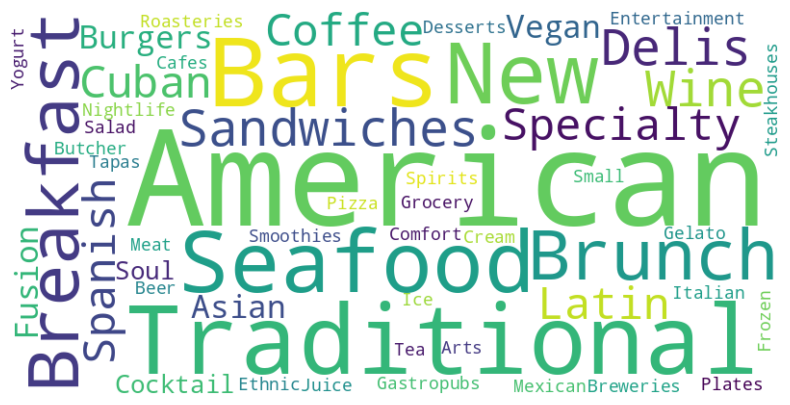

In [40]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(category for category in categories_in_top_10_businesses['categories'])

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Restaurants', 'Food', 'Restaurant',"&","Markets","Shops"])


cleaned_words = [word for word in text.split() if word not in custom_stopwords]

word_counts = Counter(cleaned_words)

sorted_words = word_counts.most_common()

# for word, count in sorted_words:
#     print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
